In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("iris.csv",sep=',')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [7]:
feature_columns = ['sepal_length' , 'sepal_width' , 'petal_length' ,'petal_width']
X = data[feature_columns].values
y = data['species'].values

In [8]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
data['species']=data['species'].map({'setosa':0,'versicolor':1,'virginica':2})

In [11]:
x=data[['sepal_length','sepal_width','petal_length','petal_width']]
y=data['species']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [14]:
knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.9666666666666667


In [15]:
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)

print(distance(y_pred,y_test))

1.0


In [16]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 1.0
Accuracy for k= 2 is: 0.93
Accuracy for k= 3 is: 1.0
Accuracy for k= 4 is: 0.93
Accuracy for k= 5 is: 0.97
Accuracy for k= 6 is: 0.97
Accuracy for k= 7 is: 1.0
Accuracy for k= 8 is: 0.97
Accuracy for k= 9 is: 1.0
Accuracy for k= 10 is: 0.97
Accuracy for k= 11 is: 1.0
Accuracy for k= 12 is: 1.0
Accuracy for k= 13 is: 1.0
Accuracy for k= 14 is: 1.0
Accuracy for k= 15 is: 1.0
Accuracy for k= 16 is: 1.0
Accuracy for k= 17 is: 1.0
Accuracy for k= 18 is: 1.0
Accuracy for k= 19 is: 1.0
Accuracy for k= 20 is: 0.97
Accuracy for k= 21 is: 1.0
Accuracy for k= 22 is: 1.0
Accuracy for k= 23 is: 0.97
Accuracy for k= 24 is: 0.93
Accuracy for k= 25 is: 0.93
Accuracy for k= 26 is: 0.9
Accuracy for k= 27 is: 0.93
Accuracy for k= 28 is: 0.93
Accuracy for k= 29 is: 0.9


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0,  7,  2],
       [ 0,  1,  8]], dtype=int64)

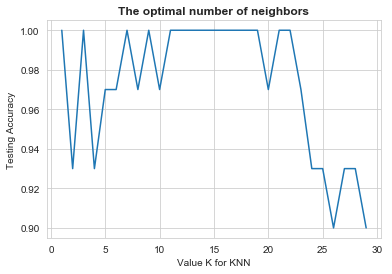

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
k_list = list(range(1,30))
plt.title('The optimal number of neighbors', fontweight='bold')
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')
sns.set_style("whitegrid")
plt.plot(k_list, scores)
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error 
print("MSE", mean_squared_error(y_test, y_pred))

MSE 0.1
